In [1]:
import pandas as pd
import numpy as np

In [2]:
adv=pd.read_csv("D:/dataset/Advertising.csv")

In [3]:
adv.head()

,Unnamed: 0,TV,radio,newspaper,sales
0,1,230.1,37.8,69.2,22.1
1,2,44.5,39.3,45.1,10.4
2,3,17.2,45.9,69.3,9.3
3,4,151.5,41.3,58.5,18.5
4,5,180.8,10.8,58.4,12.9


In [7]:
m=0.1
c=10
N=adv.shape[0]
y_pred=m*adv['TV']+c
#rmse=(adv['TV']-y_pred.apply(lambda v: np.square(v)).sum()/N)
rmse=np.square(adv['TV']-y_pred).sum()/N
rmse=np.sqrt(rmse)
rmse

144.5934454928715

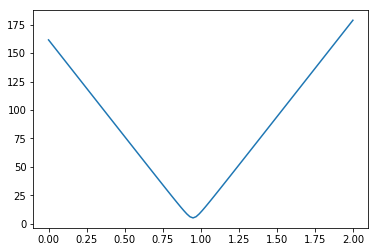

In [11]:
c=10
N=adv.shape[0]

errors=[]
m_values=[]
for m in np.linspace(0,2,100):
    y_pred=m*adv['TV']+c
    rmse=np.square(adv['TV']-y_pred).sum()/N
    rmse=np.sqrt(rmse)
    errors.append(rmse)
    m_values.append(m)
import matplotlib.pyplot as plt 
%matplotlib inline
plt.plot(m_values, errors)


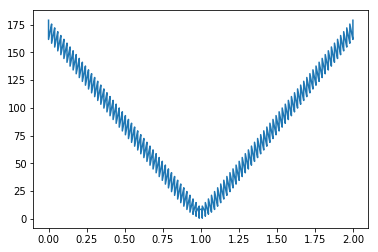

In [13]:
#c=10
N=adv.shape[0]

errors=[]
m_values=[]
c_values=[]
for m in np.linspace(0,2,100):
    for c in np.linspace(-10,10,100):
        y_pred=m*adv['TV']+c
        rmse=np.square(adv['TV']-y_pred).sum()/N
        rmse=np.sqrt(rmse)
        errors.append(rmse)
        m_values.append(m)
        c_values.append(c)
import matplotlib.pyplot as plt 
%matplotlib inline
plt.plot(m_values, errors)


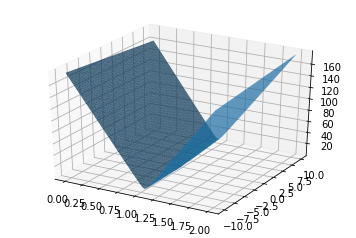

In [14]:
from mpl_toolkits.mplot3d import Axes3D
fig=plt.figure()
ax=fig.gca(projection='3d')
ax.plot_trisurf(m_values,c_values,errors)

In [1]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

In [3]:
adv=pd.read_csv("D:/dataset/Advertising.csv")
adv.head()

,Unnamed: 0,TV,radio,newspaper,sales
0,1,230.1,37.8,69.2,22.1
1,2,44.5,39.3,45.1,10.4
2,3,17.2,45.9,69.3,9.3
3,4,151.5,41.3,58.5,18.5
4,5,180.8,10.8,58.4,12.9


In [29]:
train,test=train_test_split(adv,test_size=0.2,random_state=100)

train_x=train[['TV']]#2 square brackets are taken because we need a 2d array which is a dtaframe and [['TV']] this gives a dataframe
train_y=train['sales']


In [37]:
scaler=StandardScaler()
scaler.fit(train_x)
train_x_scaled=pd.DataFrame(scaler.transform(train_x),columns=train_x.columns , index = train_x.index)

In [38]:
###standard scalar will divide the values with sd for +ve and -ve values, 
#####whereas normalization will divide the values with their max values for range from 0 to 1
from sklearn.linear_model import LinearRegression

model=LinearRegression()
model.fit(train_x_scaled,train_y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [39]:
model.coef_

array([4.18753862])

In [40]:
model.intercept_

13.798750000000002

In [41]:
m_old=0
c_old=0
m_values=[]
c_values=[]
alpha=0.1
n=train_x_scaled.shape[0]
for i in range(1000):
    #update m
    sum_part = (2/n) * ((-1 * train_x_scaled['TV'] * train_y) + \
                    (m_old * np.square(train_x_scaled['TV'])) + \
                    (c_old * train_x_scaled['TV'])).sum()
    m_new = m_old - alpha * sum_part
    
    #update c
    sum_part = (2/n) * (m_old * train_x_scaled['TV'] + c_old - train_y).sum()
    
    c_new=c_old-alpha*sum_part
    
    m_values.append(m_new)
    c_values.append(c_new)
    
    m_old=m_new
    c_old=c_new
m_new,c_new

(4.187538615177145, 13.798749999999997)

In [42]:
m_old=0
c_old=0
m_values=[]
c_values=[]
error_values=[]
alpha=0.1
n=train_x_scaled.shape[0]
for i in range(1000):
    #update m
    sum_part = (2/n) * ((-1 * train_x_scaled['TV'] * train_y) + \
                    (m_old * np.square(train_x_scaled['TV'])) + \
                    (c_old * train_x_scaled['TV'])).sum()
    m_new = m_old - alpha * sum_part
    
    #update c
    sum_part = (2/n) * (m_old * train_x_scaled['TV'] + c_old - train_y).sum()
    
    c_new=c_old-alpha*sum_part
    
    error=(1/n) * np.square(train_y - m_old * train_x_scaled['TV'] \
                           - c_old).sum()
    
    error_values.append(error)
    m_values.append(m_new)
    c_values.append(c_new)
    
    m_old=m_new
    c_old=c_new
m_new,c_new

(4.187538615177145, 13.798749999999997)

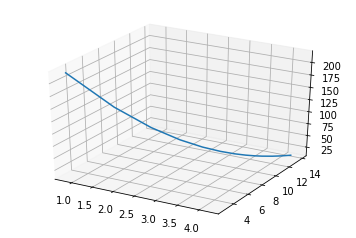

In [43]:
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt
fig=plt.figure()
ax=fig.gca(projection='3d')
ax.plot(m_values,c_values,error_values)